In [1]:
import pandas as pd
import plotly.express as px

# 1. Read data
df = pd.read_csv("/content/mens_d1_22-23_clusters_revised2.csv")



In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

def plot_player_skills(df, player_name):
    # Locate player's row
    player_row = df[df["player"] == player_name]


    hybrids = df[["all_around", "three_level_scorer", "off_ball_wing", "in_and_out_facilitator"]]
    interior = df[['interior_facilitator', 'rim_roller', 'slasher','rebounder']]
    perimeter = df[['perimeter_scorer','spotup_shooter', 'perimeter_playmaker', 'stretch_shooter']]
    important_ind = player_row.index[0]
    perim_classes = perimeter.iloc[important_ind]
    interior_classes = interior.iloc[important_ind]
    hybrid_classes = hybrids.iloc[important_ind]

    # Replace underscores with spaces for the index names
    perim_index = [s.replace("_", " ") for s in perim_classes.index]
    interior_index = [s.replace("_", " ") for s in interior_classes.index]
    hybrid_index = [s.replace("_", " ") for s in hybrid_classes.index]

    # Combine values and convert to percentages (multiplying by 100)
    values = list(perim_classes.values) + list(interior_classes.values) + list(hybrid_classes.values)
    percent_values = [val * 100 for val in values]

    data = {
        "Major Category": (["Perimeter"] * len(perim_classes) +
                          ["Interior"] * len(interior_classes) +
                          ["Hybrid"] * len(hybrid_classes)),
        "Class": perim_index + interior_index + hybrid_index,
        "Value (%)": percent_values
    }

    df_bar = pd.DataFrame(data)

    # Extract top 3 skills
    top3_df = df_bar.sort_values(by="Value (%)", ascending=False).head(3)
    df_bar_sorted = df_bar.sort_values(by="Value (%)", ascending=False)

    # Create 3-row layout
    fig = make_subplots(
        rows=3, cols=1,
        row_heights=[0.35, 0.4, 0.25],
        vertical_spacing=0.05,
        specs=[[{"type": "domain"}],   # pure annotation space
              [{"type": "xy"}],
              [{"type": "table"}]]
    )

    # --- Row 1: Top 3 annotations only ---
    annotations = []
    for i, (idx, row) in enumerate(top3_df.iterrows()):
        formatted_value = f"{row['Value (%)']:.1f}%"
        text = f"{row['Class']}: {formatted_value}"
        annotations.append(dict(
            x=0.5,
            y= 0.9 - i * 0.05,  # space lines downward
            xref="paper",
            yref="paper",
            text=text,
            showarrow=False,
            font=dict(size=36, color="black", family="Roboto"),
            xanchor="center"
        ))

    # --- Row 2: Grouped bar chart ---
    bar_fig = px.bar(
        df_bar,
        x="Major Category",
        y="Value (%)",  # already multiplied by 100
        color="Class",
        barmode="group"
    )

    for trace in bar_fig.data:
        fig.add_trace(trace, row=2, col=1)

    fig.update_xaxes(title_text="Major Category", row=2, col=1)
    fig.update_yaxes(title_text="Value (%)", row=2, col=1)

    # --- Row 3: Table ---
    table_trace = go.Table(
        header=dict(
            values=list(df_bar_sorted.columns),
            fill_color='paleturquoise',
            align='left'
        ),
        cells=dict(
            values=[df_bar_sorted[col] for col in df_bar_sorted.columns],
            fill_color='lavender',
            align='left'
        )
    )
    fig.add_trace(table_trace, row=3, col=1)

    # --- Layout ---
    fig.update_layout(
        annotations=annotations,
        title_text=f"Skill Overview for {player_name}",
        width=900,
        height=1000,
        plot_bgcolor="white"
    )

    fig.write_image(f"{player_name}_skills.png")

    # Optionally: display the PNG in the notebook
    from IPython.display import Image, display
    display(Image(filename=f"{player_name}_skills.png"))

    #fig.show()



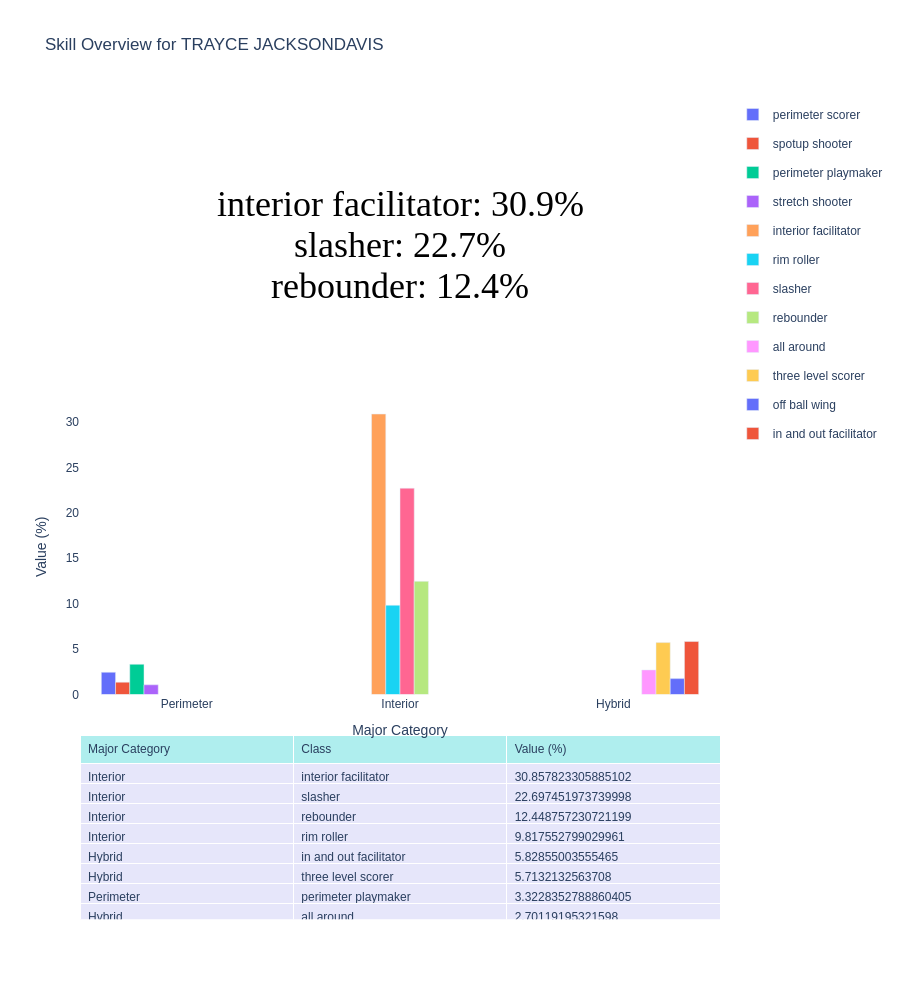

In [22]:
plot_player_skills(df, "TRAYCE JACKSONDAVIS")

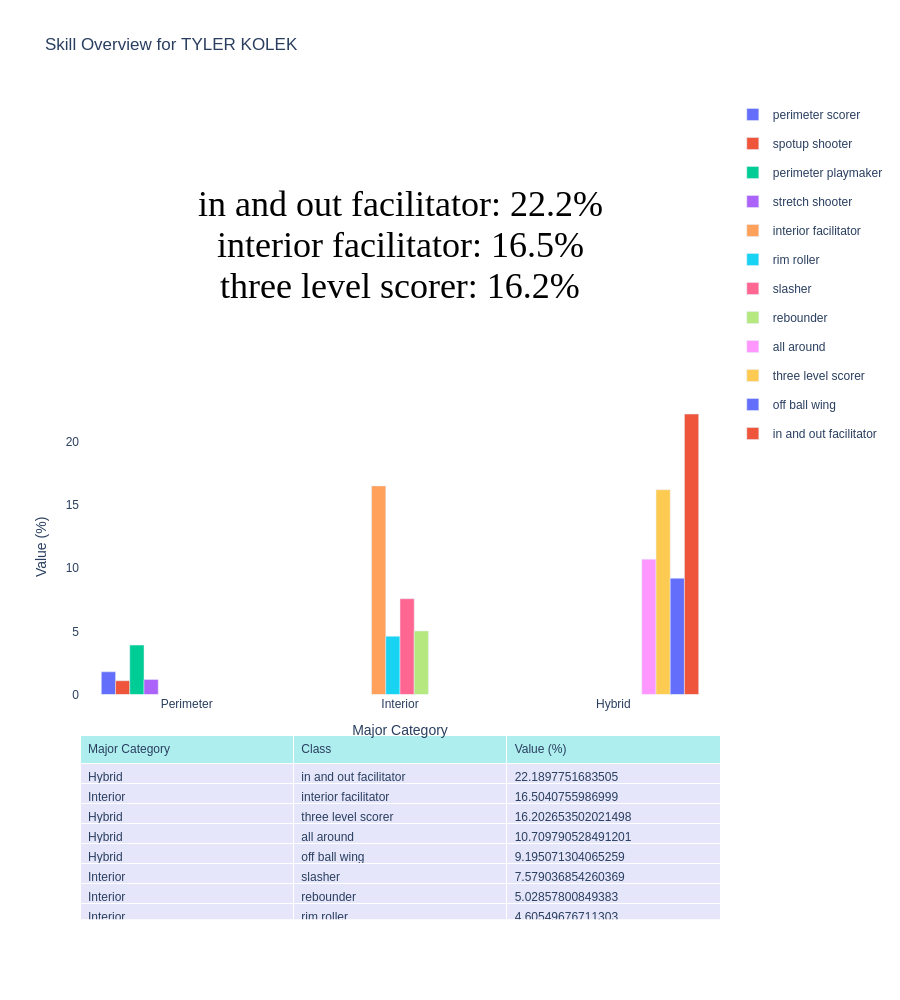

In [23]:
plot_player_skills(df, "TYLER KOLEK")

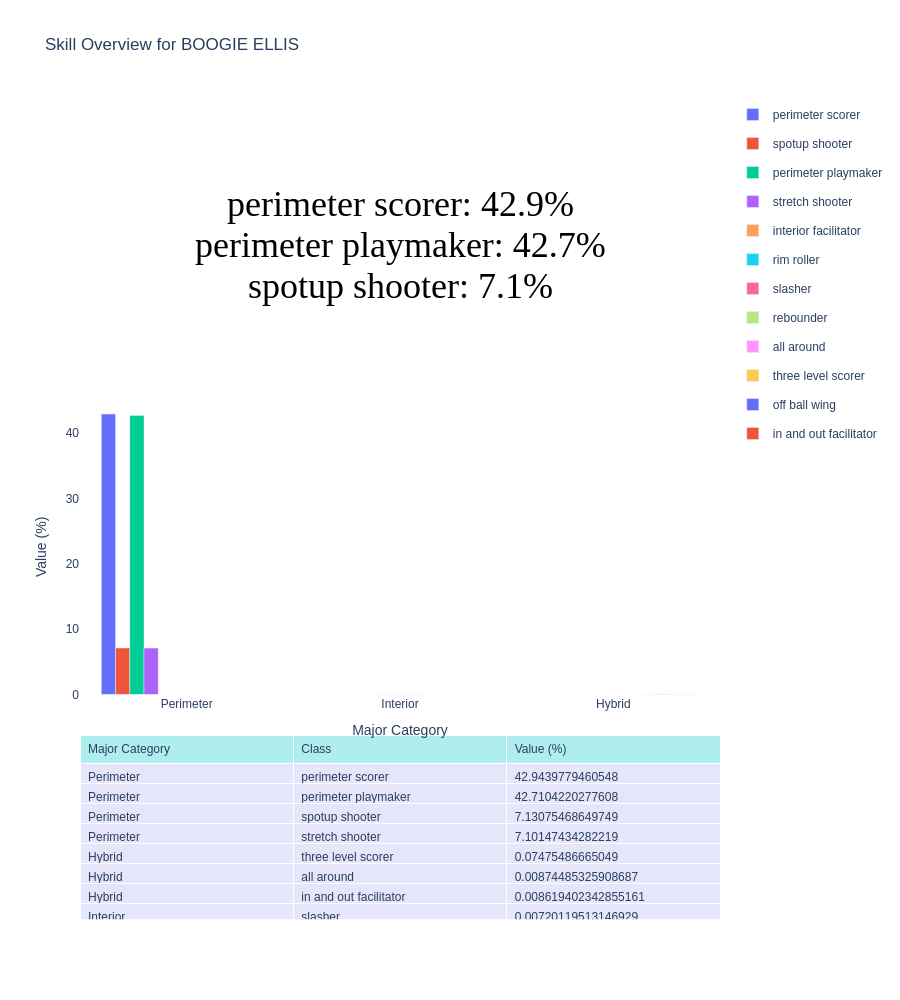

In [24]:
plot_player_skills(df, "BOOGIE ELLIS")


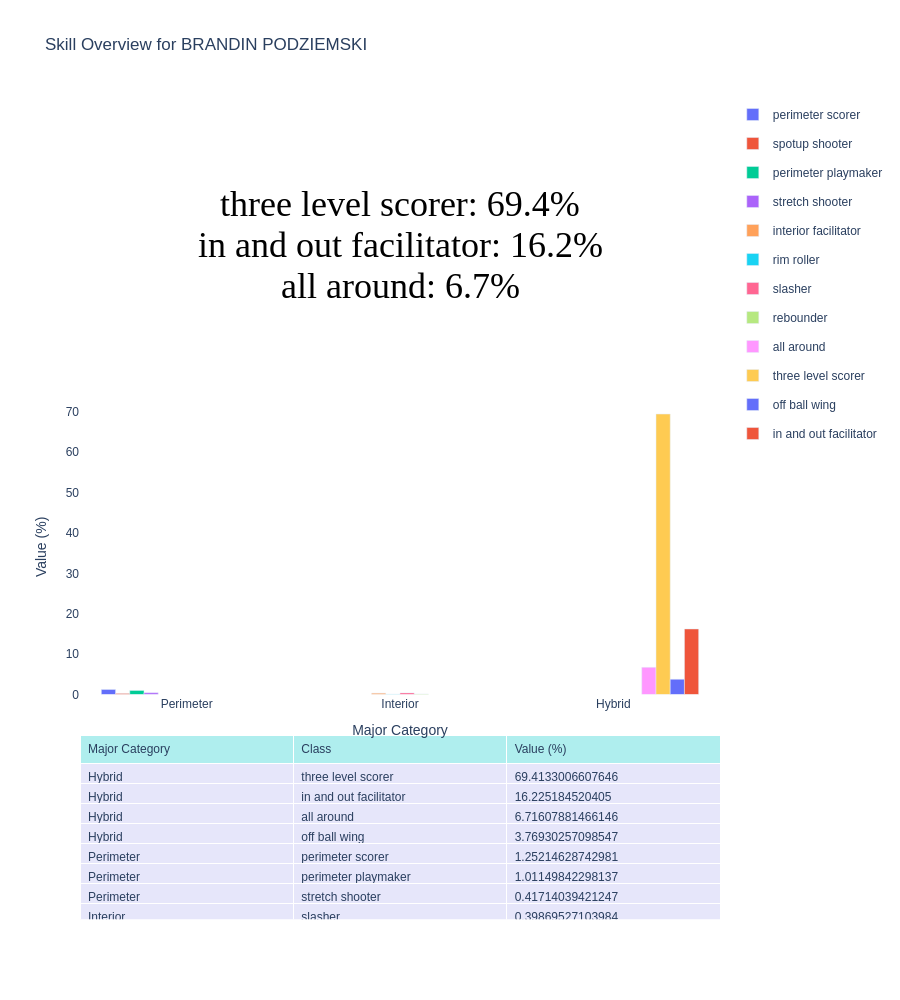

In [25]:
plot_player_skills(df, "BRANDIN PODZIEMSKI")

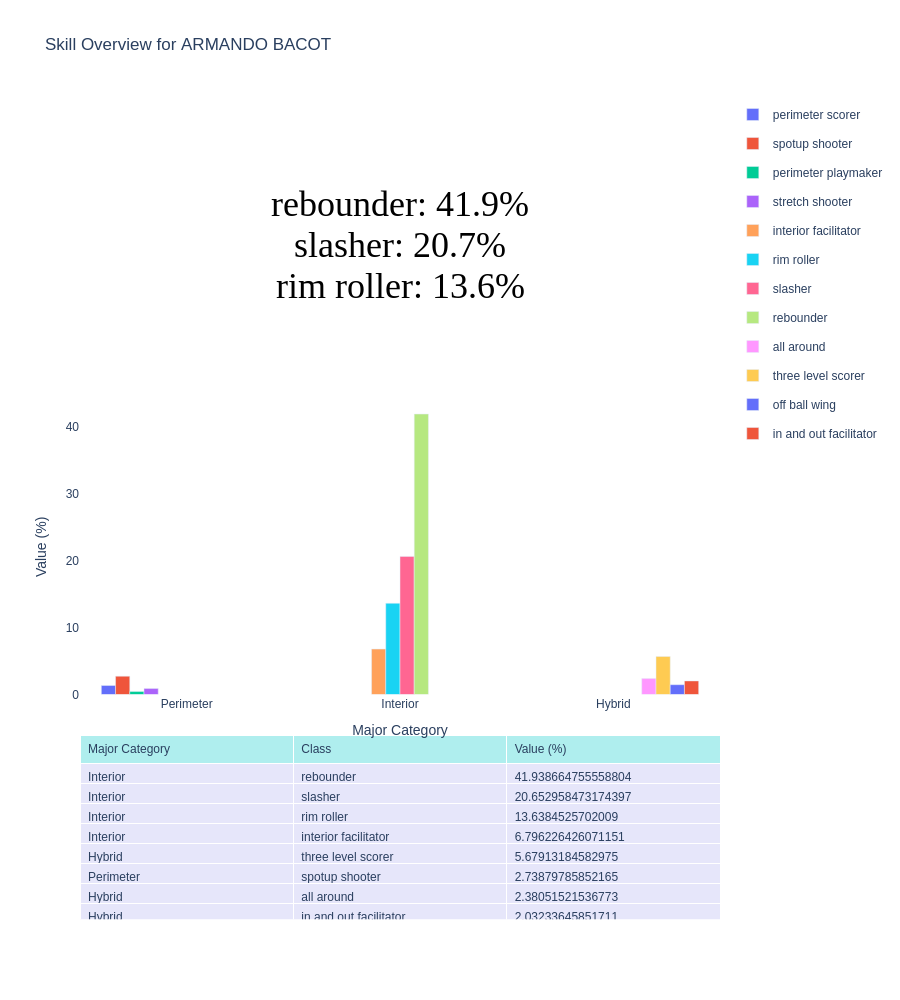

In [26]:
plot_player_skills(df, "ARMANDO BACOT")

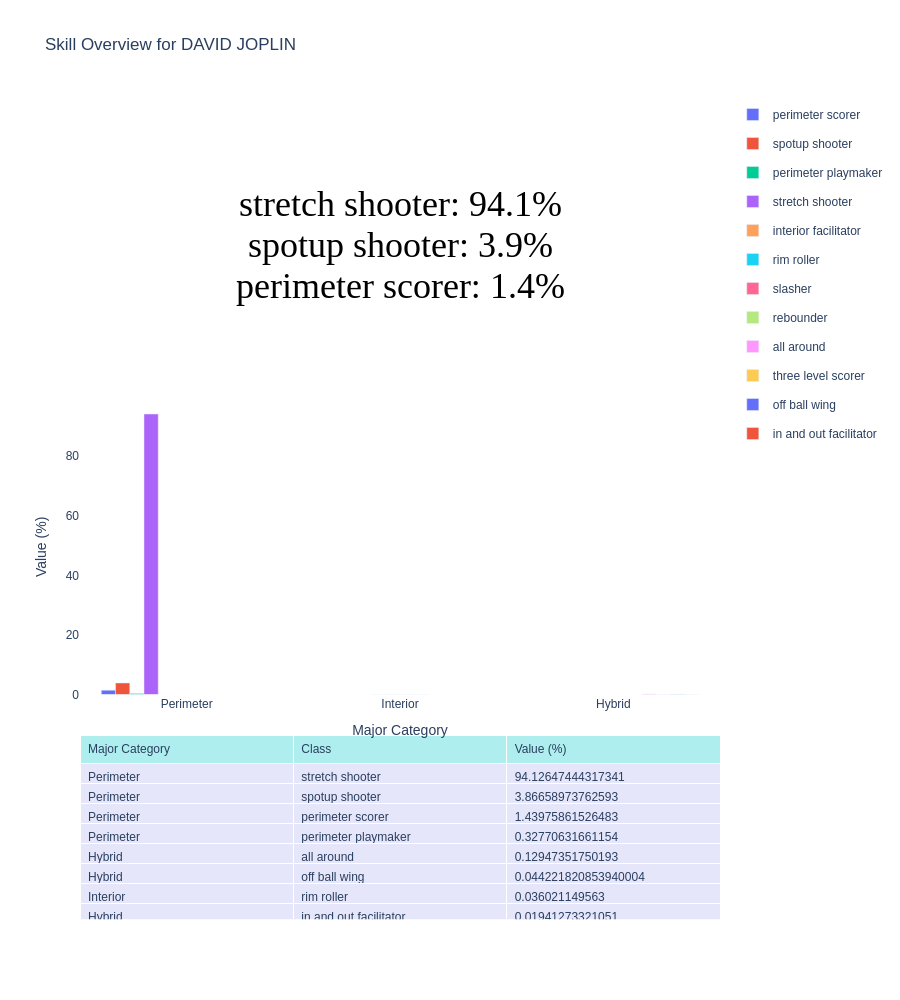

In [27]:
plot_player_skills(df, "DAVID JOPLIN")

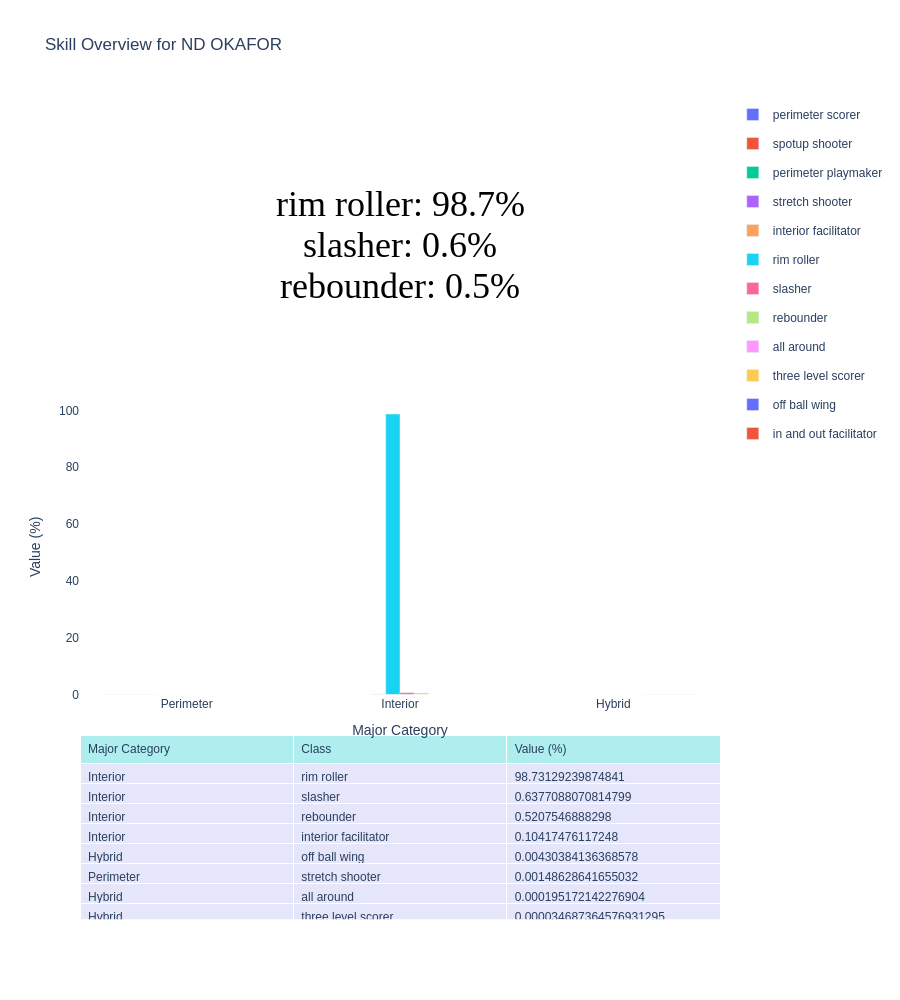

In [28]:
plot_player_skills(df, "ND OKAFOR")

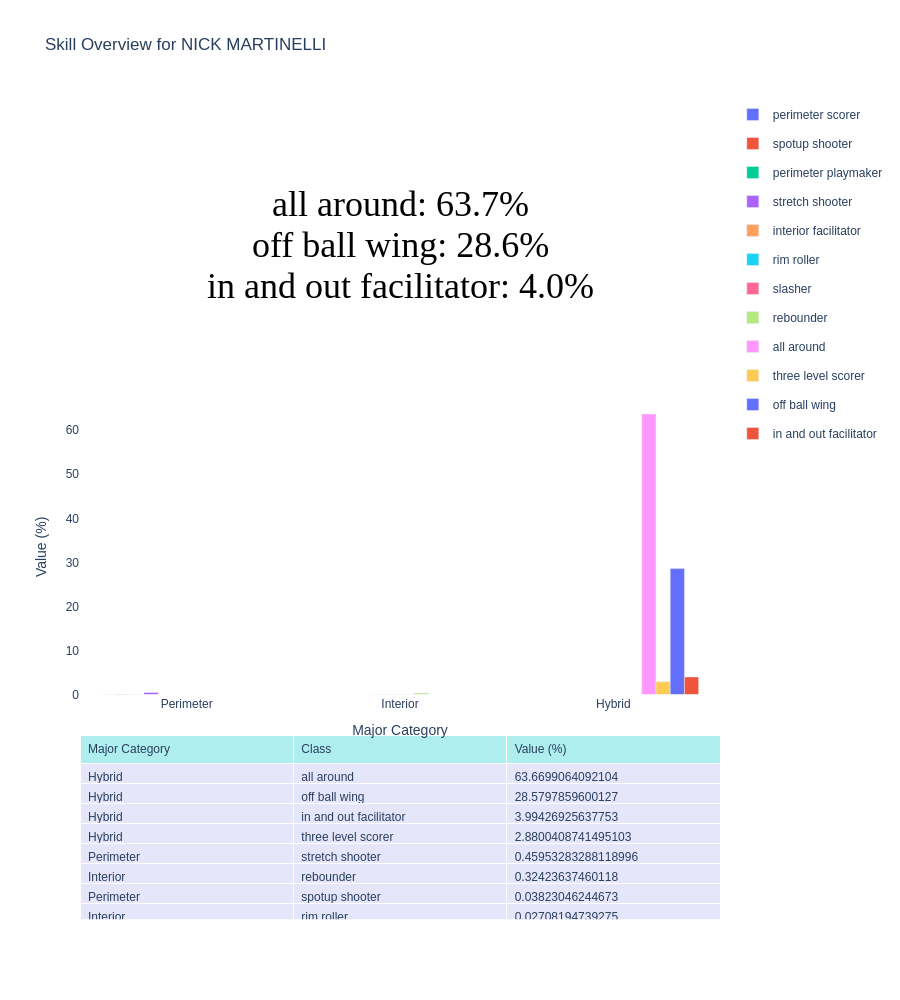

In [29]:
plot_player_skills(df,"NICK MARTINELLI")

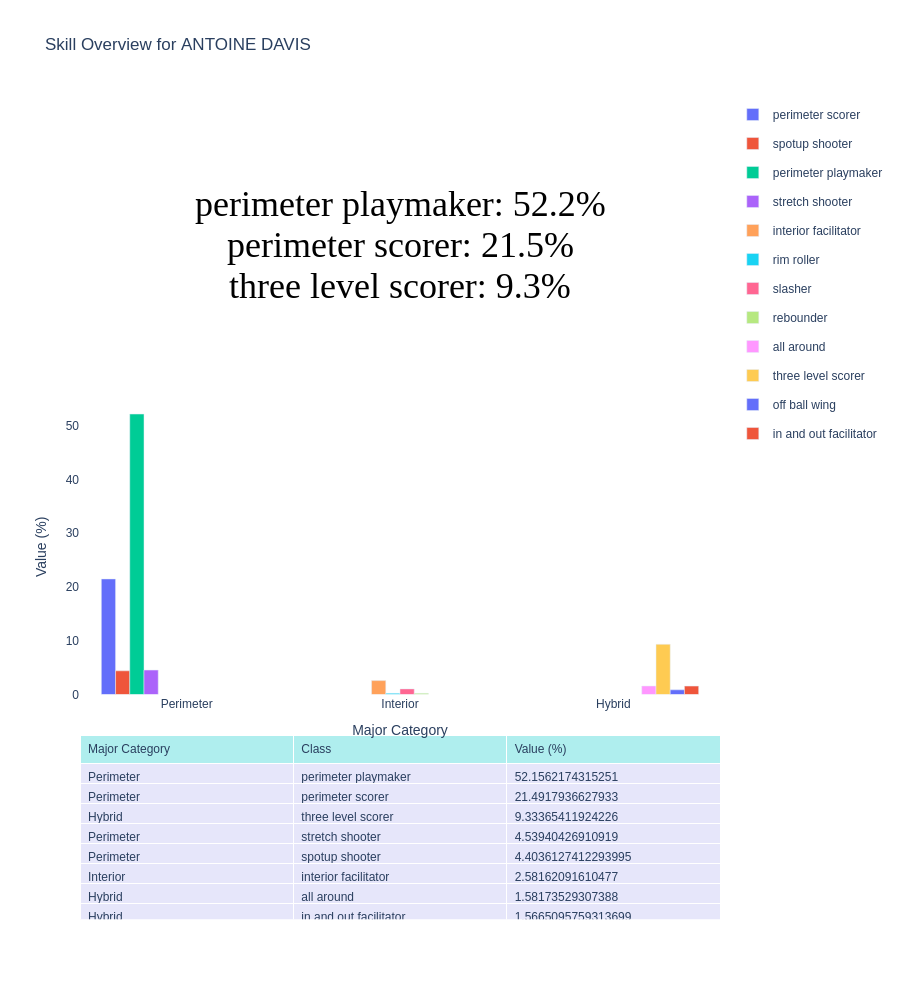

In [30]:
plot_player_skills(df,"ANTOINE DAVIS")